# Stickmodel Demo

stickmodel can be used to calculate internal forces and moments for statically determinate bar problems

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from wingstructure.structure.stickmodel import solve_equilibrium

## define bar

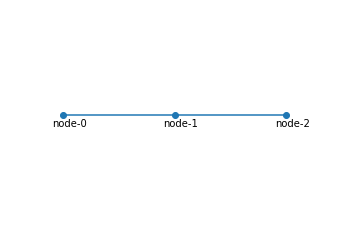

In [2]:
# straight bar with two segments
nodes = np.array([[0,0,0], [0,1,0], [0,2,0]], dtype=np.float)

def display_bar(nodes, anotate=False):
    plt.plot(nodes[:,1], nodes[:, 2], 'o-')
    plt.axis('equal')
    plt.axis('off')
    
    if not anotate:
        return
    
    for i, node in enumerate(nodes):
        plt.annotate(f'node-{i}', node[1:]-np.array([0.1, 0.1]))
        
display_bar(nodes, True)
plt.xlim(-0.5, 2.5);

## define loads

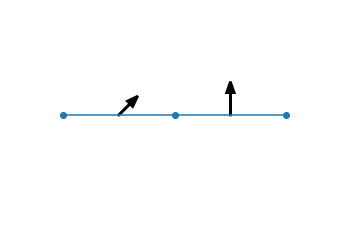

In [3]:
forces = np.array([
    [0, 0.5, 0, 0, 1, 1, 0],
    [0, 1.5, 0, 0, 0, 2, 1]
])

def display_force(ax, start, vec, color='k', arrow_size=1.0):
    if (vec==0.0).all():
        return
    else:
        ax.arrow(*start, *vec, fc=color, ec=color, head_width=arrow_size*0.07,
                 head_length=arrow_size*0.1, linewidth=2.5*arrow_size)
    
def display_forces(forces, fac=0.3, arrow_size=1.0):
    ax = plt.gca()
    for force in forces:
        display_force(ax, force[1:3], (fac*force[4:6]), arrow_size=arrow_size)
        
display_bar(nodes)
display_forces(forces, fac=0.1)
plt.xlim(-0.5, 2.5);

## calculate equilibrium

*solve_equilibrium* calculates state of equilibrium

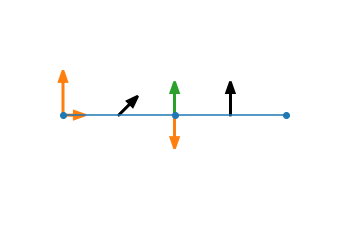

In [4]:
sol = solve_equilibrium(nodes, forces, prescribed={2:np.zeros(6)})

def display_sol(nodes, sol, fac=0.3):
    ax = plt.gca()
    for i in range(nodes.shape[0]-1):
        display_force(ax, nodes[i, 1:], fac*np.array([sol[i, 1], 0.0]), color=f'C0{i+1}')
        display_force(ax, nodes[i, 1:], fac*np.array([0.0, sol[i, 2]]), color=f'C0{i+1}')
        display_force(ax, nodes[i+1, 1:], -fac*np.array([sol[i+1, 1], 0.0]), color=f'C0{i+1}')
        display_force(ax, nodes[i+1, 1:], -fac*np.array([0.0, sol[i+1, 2]]), color=f'C0{i+1}')

display_bar(nodes)
display_forces(forces, fac=0.1)
display_sol(nodes, sol, fac=0.1)
plt.xlim(-0.5, 2.5);

# more complex model

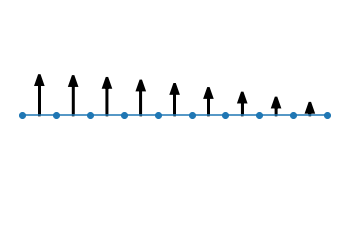

In [32]:
n = 10
l = 3.0
nodes = np.vstack((np.zeros(n), np.linspace(0, l, n), np.zeros(n))).T

forces = np.zeros((n-1, 7))

# point of attack for forces
el_mid_pts = nodes[:-1, :] + np.diff(nodes, axis=0)/2
forces[:, 0:3] = el_mid_pts

# magnitudes of forces, only z value
forces[:, 5] = np.cos(el_mid_pts[:,1]*np.pi/2/l)

# element force is acting on
forces[:,-1] = range(n-1)


display_bar(nodes)
display_forces(forces, fac=0.3)

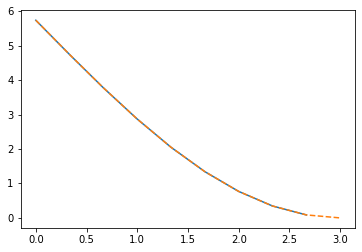

In [34]:
sol1 = np.cumsum(forces[::-1, 5])

sol2 = solve_equilibrium(nodes, forces, prescribed={n-1:np.zeros(6)})

plt.plot(nodes[:-1,1][::-1], sol1)
plt.plot(nodes[:, 1], sol2[:, 2], '--')